In [11]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft
import plotly.offline as pyo
import plotly.graph_objects as go


import mft

PHI = np.pi


# DTFT实现
def DTFT(x, xn=0):
    """
    返回一个计算DTFT的函数，输入是一个序列x
    """

    def dtft_func(w):
        """
        计算给定频率w的DTFT
        """
        n = np.arange(len(x)) - xn  # 调整时间索引以考虑零点对齐
        if isinstance(w, (list, np.ndarray)):  # 如果 w 是列表或数组
            return [np.sum(x * np.exp(-1j * wi * n)) for wi in w]
        else:  # 如果 w 是单个值
            return [np.sum(x * np.exp(-1j * w * n))]

    return dtft_func


def DFT(x):
    # 返回list
    return [
        np.sum(x * np.exp(-1j * 2 * np.pi * k / len(x) * np.arange(len(x))))
        for k in range(len(x))
    ]

def InsertDFT(Xk):
    """
    插值DFT
    复原DTFT
    """
    def Insert_func(w):
        """
        计算给定频率w的内插值
        """
        n = np.arange(len(Xk))
        if isinstance(w, (list, np.ndarray)):
            

def ffts(s):
    s = s * np.hamming(len(s))
    S = fft.fft(s)
    S = fft.fftshift(S)
    return S


x = [1, 1, 0, 1]

[3. 1. 1. 1.]


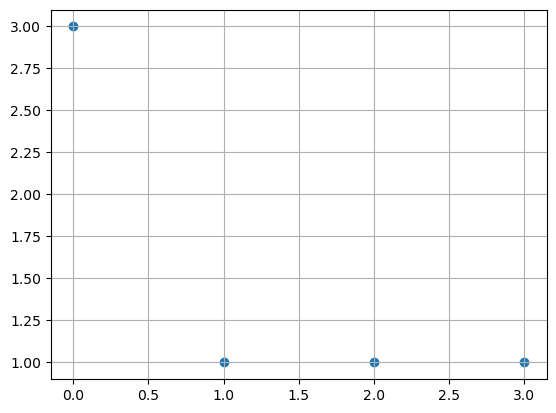

In [19]:
# DFT
X = DFT(x)
print(np.abs(X))
X_freq = np.fft.fftfreq(len(x), d=1)
# Plot
plt.figure()
plt.scatter([0,1,2,3],np.abs(X))
plt.grid()
plt.show()


In [20]:

# 计算 DTFT
Xw = DTFT(x)
t = np.linspace(-PHI, PHI, 10000)
A = np.abs(Xw(t))

# 绘图
fig = go.Figure()
fig.add_trace(go.Scatter(x=t, y=A, mode='lines', name='DTFT'))

# 添加四个点
points_x = [0, 1, 2, 3]
points_y = np.abs(DFT(x))
fig.add_trace(go.Scatter(x=points_x, y=points_y, mode='markers', name='Points', marker=dict(color='red', size=10)))

# 设置绘图范围
fig.update_layout(
    title='DTFT',
    xaxis_title='X',
    yaxis_title='Y',
    xaxis_range=[-50, 50],
    yaxis_range=[-PHI, PHI]
)

# 滑块
sliders = [
    dict(
        active=1,
        currentvalue={"prefix": "X range: "},
        steps=[
            dict(method="relayout", args=["xaxis.range", [min(t), max(t)]], label="Full Range"),
            dict(method="relayout", args=["xaxis.range", [-50, 50]], label="Zoomed Range")
        ]
    )
]

fig.update_layout(sliders=sliders)
fig.show()

C:\Users\12595\AppData\Local\Temp\ipykernel_5572\3557879763.py:22: RuntimeWarning:

divide by zero encountered in scalar divide

C:\Users\12595\AppData\Local\Temp\ipykernel_5572\3557879763.py:22: RuntimeWarning:

invalid value encountered in scalar divide

C:\Users\12595\AppData\Local\Temp\ipykernel_5572\3557879763.py:24: RuntimeWarning:

invalid value encountered in divide



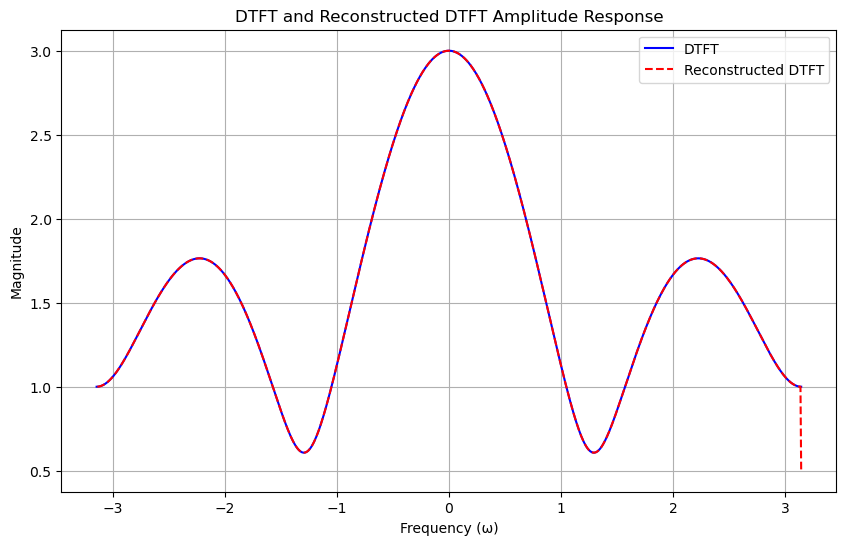

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# 定义序列 x(n)
x = np.array([1, 1, 0, 1])
N = len(x)

# 计算 DFT
X_k = np.fft.fft(x)
k = np.arange(N)

# 计算 DTFT
omega = np.linspace(-np.pi, np.pi, 1000)
X_dtft = np.array([np.sum(x * np.exp(-1j * w * np.arange(N))) for w in omega])

# 重建 DTFT 的近似
W_N = np.exp(-1j * 2 * np.pi / N)
X_reconstructed = np.zeros(len(omega), dtype=complex)

for i, w in enumerate(omega):
    for k in range(N):
        X_reconstructed[i] += X_k[k] * (1 - np.exp(-1j * w * N)) / (1 - W_N**k * np.exp(-1j * w))

X_reconstructed /= N

# 绘制幅频特性曲线
plt.figure(figsize=(10, 6))

# 绘制 DTFT 的幅频响应
plt.plot(omega, np.abs(X_dtft), label='DTFT', color='blue')

# 绘制通过 DFT 重建的 DTFT 幅频响应
plt.plot(omega, np.abs(X_reconstructed), label='Reconstructed DTFT', linestyle='--', color='red')

plt.title('DTFT and Reconstructed DTFT Amplitude Response')
plt.xlabel('Frequency (ω)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()
